# Neural Networks 5

## Autoencoder

Autoencoder is one of the most fascinating idea in deep learning that eventually lead to many great extensions. Thererfore it is important to understand the main principles of the autoencoder structure.

<div>
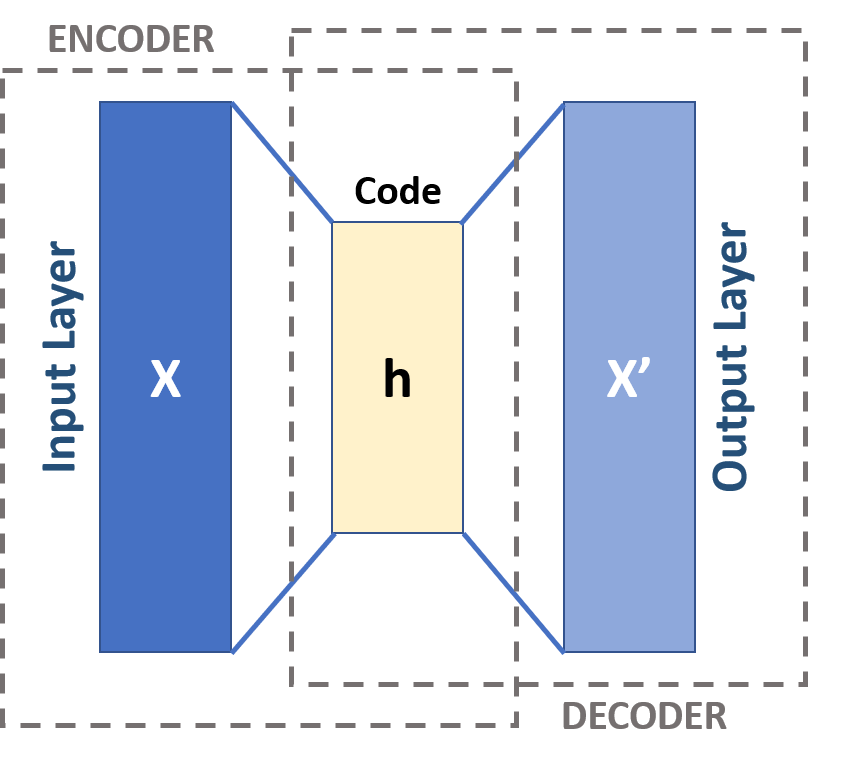
</div>

#### Demo: Image autoencoder

Import necessary packages

In [1]:
import matplotlib.pyplot as plt
#import pandas as pd
import tensorflow as tf

#from sklearn.metrics import accuracy_score, precision_score, recall_score
#from sklearn.model_selection import train_test_split
#from tensorflow.keras import layers, losses
#from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

Let's use the MNIST Fashion dataset again

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0

test_images = test_images / 255.0

print (train_images.shape)
print (test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Define a simple autoencoder structure using TF Functional API

In [8]:
latent_dim = 64 # 64 in orig demo - test with 1, 2, 8, 16

# declare input shape 
input = tf.keras.Input(shape=(28,28))

# Encoder block
x = tf.keras.layers.Flatten()(input)
encoded = tf.keras.layers.Dense(latent_dim,activation='relu')(x)
encoder = tf.keras.Model(input, encoded)


# Decoder block
y = tf.keras.layers.Dense(784,activation='sigmoid')(encoded)
decoded = tf.keras.layers.Reshape((28,28))(y)

# Bind all
autoencoder = tf.keras.Model(input, decoded)


# bind all
#autoencoder = tf.keras.Model(input, decoder)
#autoencoder = tf.keras.Model(input, decoded)

In [9]:
autoencoder.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError())

In [10]:
autoencoder.fit(train_images, train_images,
                epochs=5,
                shuffle=True,
                validation_data=(test_images, test_images))

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0243 - val_loss: 0.0134
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0118 - val_loss: 0.0108
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0102 - val_loss: 0.0098
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0092 - val_loss: 0.0092


In [11]:
#encoded_imgs = autoencoder.encoder(x_test).numpy()
#decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(test_images.shape)
encoded_imgs = encoder(test_images)
print(encoded_imgs.shape)
decoded_imgs = autoencoder.predict(test_images)
print(decoded_imgs.shape)

(10000, 28, 28)
(10000, 64)
313/313 [==============================] - 1s 3ms/step
(10000, 28, 28)


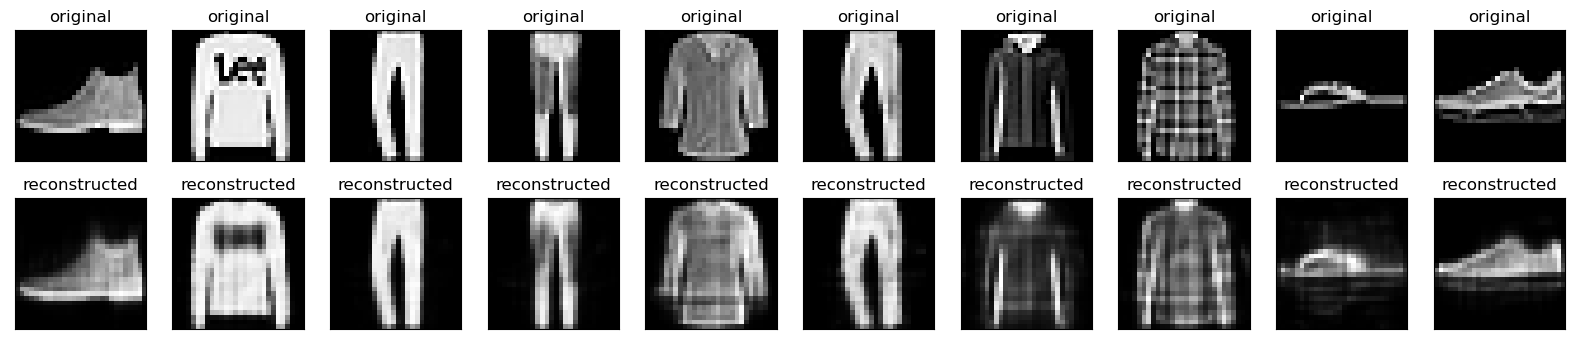

In [12]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(test_images[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Convolutional autoencoder

Inspired by the idea of "fully convolutional neural networks" in

 * J Long, E Shelhamer, T Darrell (2015): "Fully convolutional networks for semantic segmentation". In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. [PDF](https://openaccess.thecvf.com/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf)

#### Demo: Deconvolution (Conv2DTranspose)

Demo borrowed from the excellent introduction at:

 * https://towardsdatascience.com/understand-transposed-convolutions-and-build-your-own-transposed-convolution-layer-from-scratch-4f5d97b2967

In [13]:
import numpy as np

In [14]:
X = np.array([[3, 5, 2, 7], [4, 1, 3, 8], [6, 3, 8, 2], [9, 6, 1, 5]])
X = X.reshape(1, 4, 4, 1)
model_Conv2D = tf.keras.models.Sequential()
model_Conv2D.add(tf.keras.layers.Conv2D(1, (3, 3), strides=(1, 1), padding='valid', input_shape=(4, 4, 1)))
weights = [np.asarray([[[[1]], [[2]], [[1]]], [[[2]], [[1]], [[2]]], [[[1]], [[1]], [[2]]]]), np.asarray([0])]
model_Conv2D.set_weights(weights)
yhat = model_Conv2D.predict(X)
yhat.reshape(2, 2)

1/1 [==============================] - 0s 74ms/step


array([[55., 52.],
       [57., 50.]], dtype=float32)

In [15]:
X = yhat
model_Conv2D = tf.keras.models.Sequential()
model_Conv2D.add(tf.keras.layers.Conv2DTranspose(1, (3, 3), strides=(1, 1), padding='valid', input_shape=(2, 2, 1)))
weights = [np.asarray([[[[1]], [[2]], [[1]]], [[[2]], [[1]], [[2]]], [[[1]], [[1]], [[2]]]]), np.asarray([0])]
model_Conv2D.set_weights(weights)
yhat = model_Conv2D.predict(X)
yhat.reshape(4, 4)

1/1 [==============================] - 0s 87ms/step


array([[ 55., 162., 159.,  52.],
       [167., 323., 319., 154.],
       [169., 264., 326., 204.],
       [ 57., 107., 164., 100.]], dtype=float32)

## Autoencoder Applications

<div>
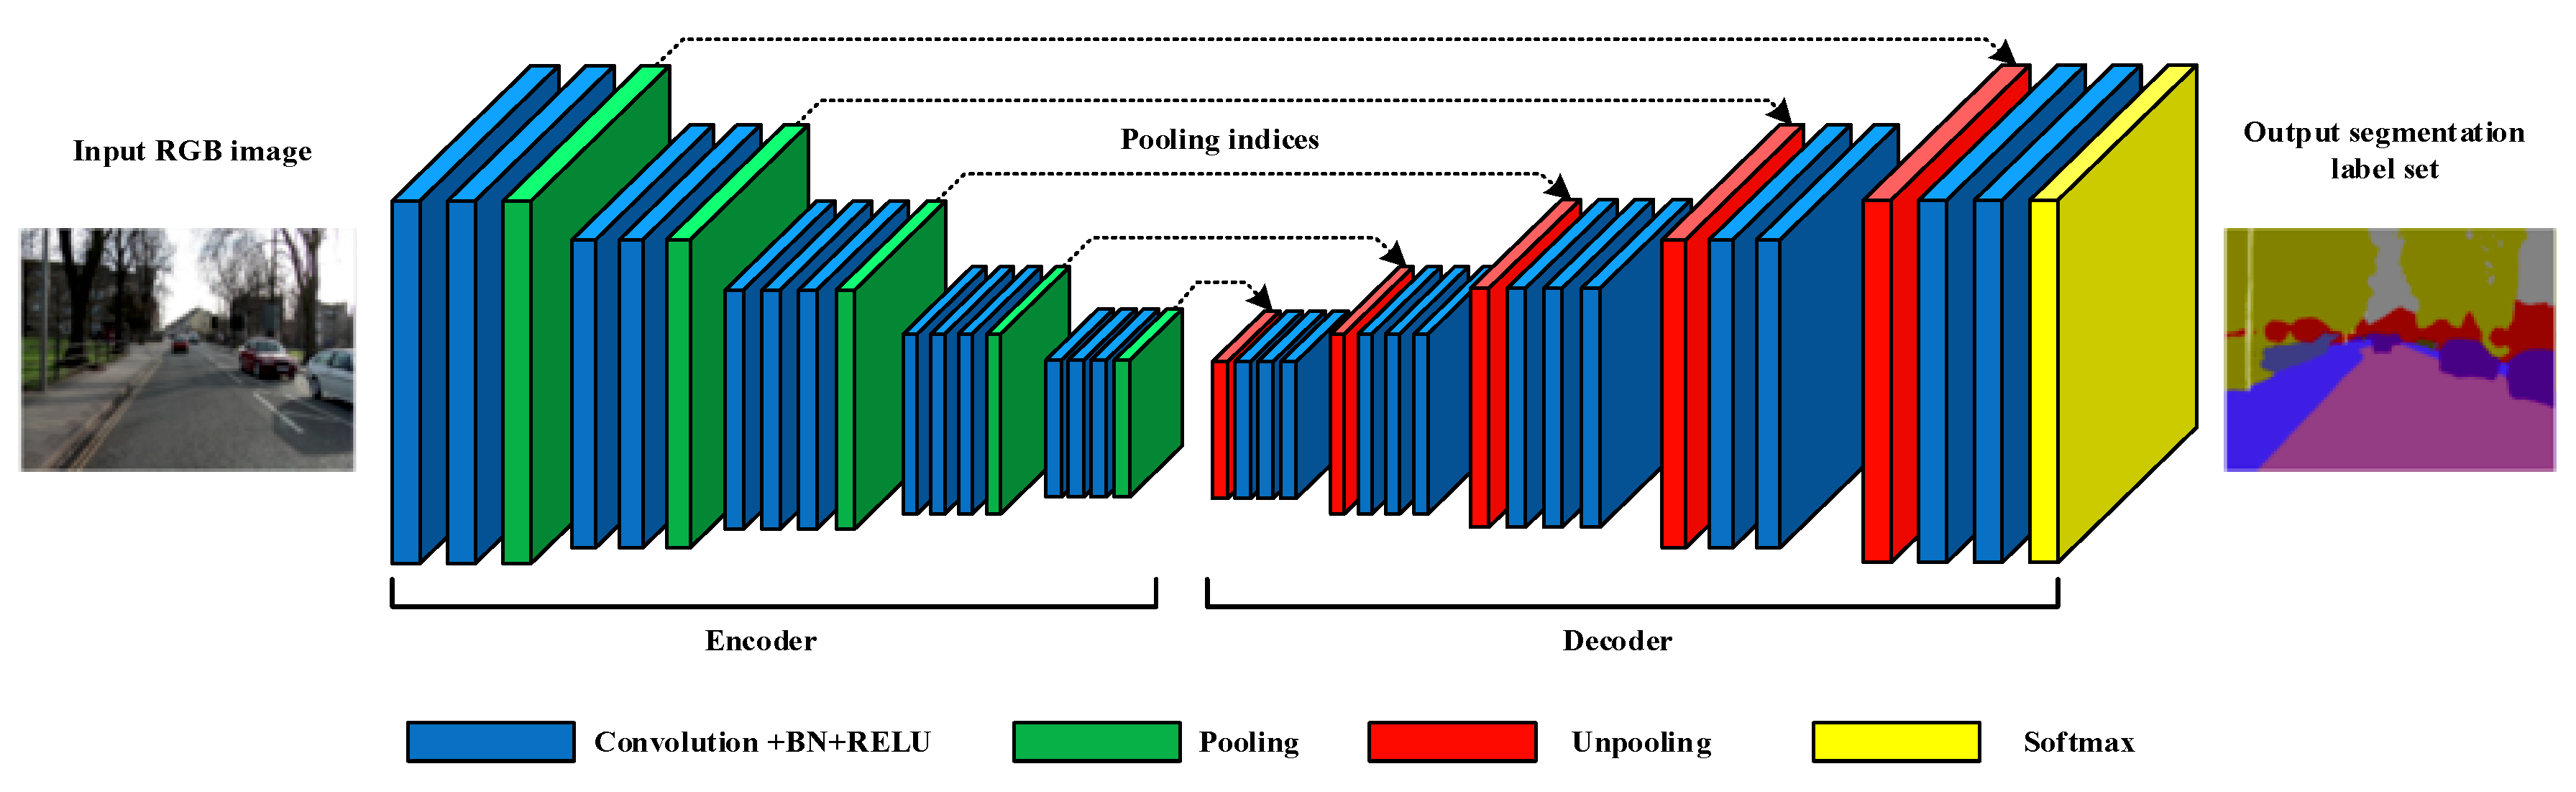
</div>

#### Demo: Image denoising
Demo from TF tutorials

Let's add that magical one dimension of keep TF happy

In [16]:
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

Let's add noise to the same MNIST images

In [17]:
noise_factor = 0.2
train_images_noisy = train_images + noise_factor * tf.random.normal(shape=train_images.shape) 
test_images_noisy = test_images + noise_factor * tf.random.normal(shape=test_images.shape) 

# Make sure values still in (0,1)
train_imagse_noisy = tf.clip_by_value(train_images_noisy, clip_value_min=0., clip_value_max=1.)
test_images_noisy = tf.clip_by_value(test_images_noisy, clip_value_min=0., clip_value_max=1.)

Print a few examples

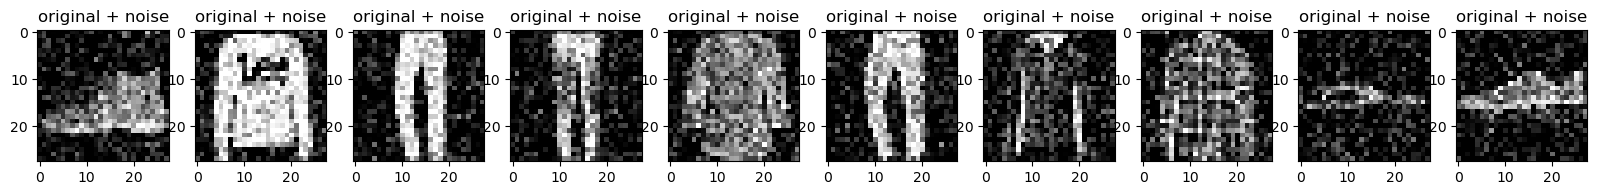

In [18]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(test_images_noisy[i]))
    plt.gray()
plt.show()

Define autoencoder sturcture for denoising (Using TF Subclassing)

In [19]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(28, 28, 1)),
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

Compile the model

In [20]:
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

Train the autoencoder

In [21]:
# epochs 5-10 should be enough
autoencoder.fit(train_images_noisy, train_images,
                epochs=1,
                shuffle=True,
                validation_data=(test_images_noisy, test_images))

1875/1875 [==============================] - 93s 48ms/step - loss: 0.0192 - val_loss: 0.0113


We can inspect what the encoder part does

In [22]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


and what the decoder part does

In [23]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_1 (Conv2DT  (None, 14, 14, 8)        584       
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


Visually check the quality of denoised images on unseen test images.

In [24]:
encoded_imgs = autoencoder.encoder(test_images).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

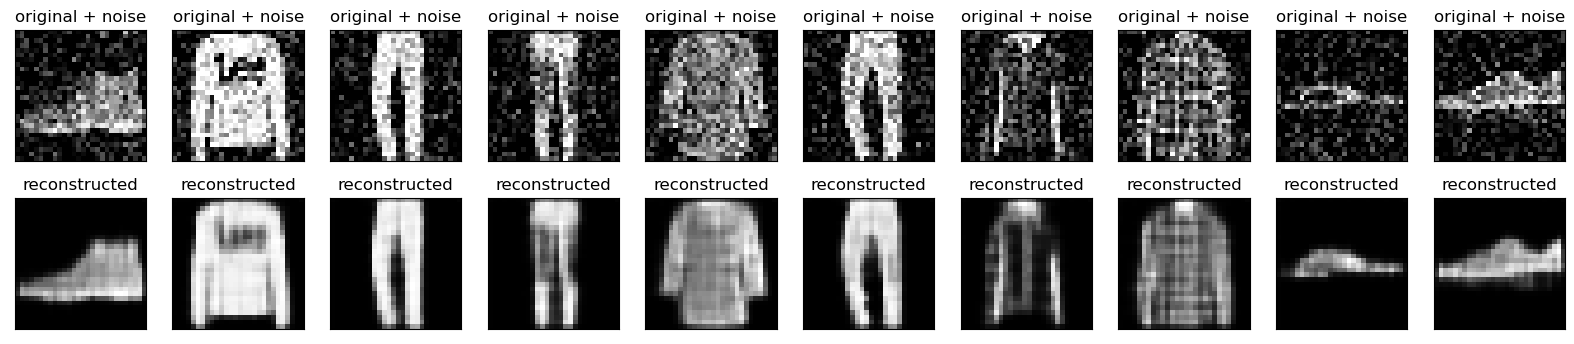

In [25]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(test_images_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

#### Demo: Anomaly detection

Code from TF tutorial demo

In this example, you will train an autoencoder to detect anomalies on the [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000). This dataset contains 5,000 [Electrocardiograms](https://en.wikipedia.org/wiki/Electrocardiography), each with 140 data points. You will use a simplified version of the dataset, where each example has been labeled either `0` (corresponding to an abnormal rhythm), or `1` (corresponding to a normal rhythm). You are interested in identifying the abnormal rhythms.

Note: This is a labeled dataset, so you could phrase this as a supervised learning problem. The goal of this example is to illustrate anomaly detection concepts you can apply to larger datasets, where you do not have labels available (for example, if you had many thousands of normal rhythms, and only a small number of abnormal rhythms).

How will you detect anomalies using an autoencoder? Recall that an autoencoder is trained to minimize reconstruction error. You will train an autoencoder on the normal rhythms only, then use it to reconstruct all the data. Our hypothesis is that the abnormal rhythms will have higher reconstruction error. You will then classify a rhythm as an anomaly if the reconstruction error surpasses a fixed threshold.

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).

In [26]:
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split

Load data

In [27]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


Form training and test sets

In [28]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Normalize data to (0,1)

In [29]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

You will train the autoencoder using only the normal rhythms, which are labeled in this dataset as `1`. Separate the normal rhythms from the abnormal rhythms.

In [30]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Plot normal ECG

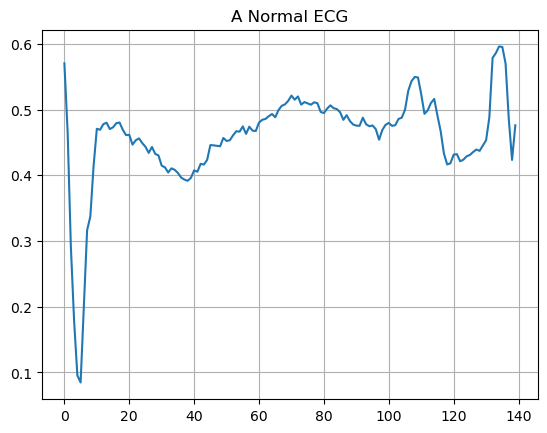

In [31]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

Plot an anomalous ECG.

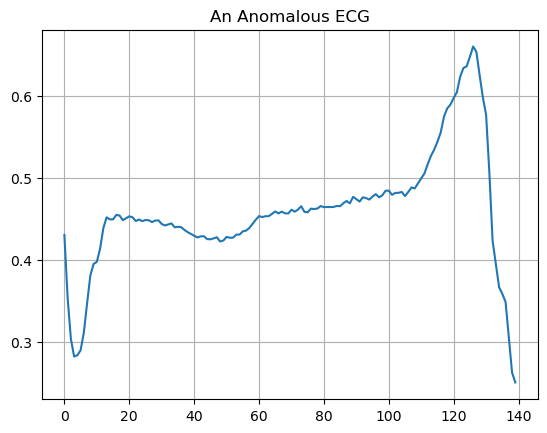

In [32]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

Let's make 1D encoder-decoder

In [33]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [34]:
autoencoder.compile(optimizer='adam', loss='mae')

Autoencoder is trained with **only** the normal ECG signals

In [35]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 4s 124ms/step - loss: 0.0570 - val_loss: 0.0525
Epoch 2/20
5/5 [==============================] - 0s 30ms/step - loss: 0.0535 - val_loss: 0.0509
Epoch 3/20
5/5 [==============================] - 0s 33ms/step - loss: 0.0494 - val_loss: 0.0486
Epoch 4/20
5/5 [==============================] - 0s 36ms/step - loss: 0.0451 - val_loss: 0.0460
Epoch 5/20
5/5 [==============================] - 0s 28ms/step - loss: 0.0410 - val_loss: 0.0438
Epoch 6/20
5/5 [==============================] - 0s 35ms/step - loss: 0.0370 - val_loss: 0.0416
Epoch 7/20
5/5 [==============================] - 0s 33ms/step - loss: 0.0337 - val_loss: 0.0400
Epoch 8/20
5/5 [==============================] - 0s 37ms/step - loss: 0.0311 - val_loss: 0.0389
Epoch 9/20
5/5 [==============================] - 0s 32ms/step - loss: 0.0290 - val_loss: 0.0381
Epoch 10/20
5/5 [==============================] - 0s 33ms/step - loss: 0.0274 - val_loss: 0.0370
Epoch 11/20
5/5 [===========

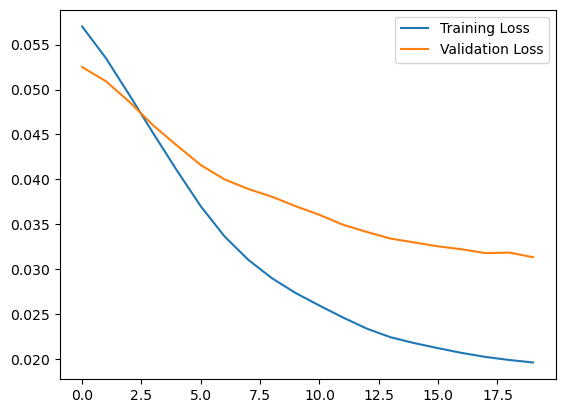

In [36]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

You will soon classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. First, let's plot a normal ECG from the training set, the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error.

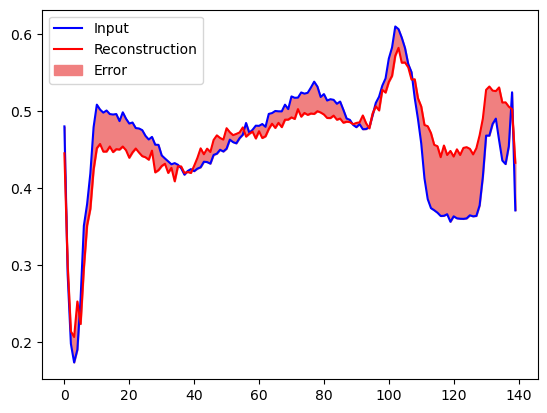

In [37]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Let's try the same for an anomalous sample

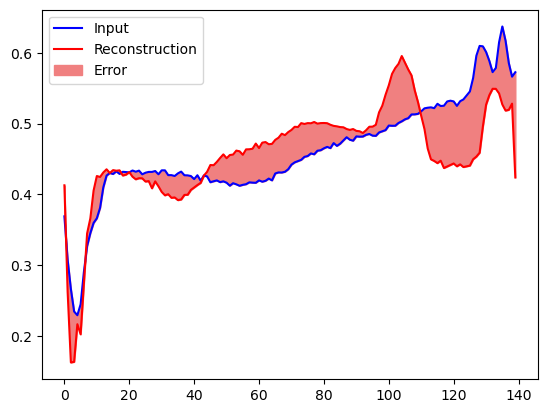

In [38]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold. In this tutorial, you will calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.

74/74 [==============================] - 0s 4ms/step


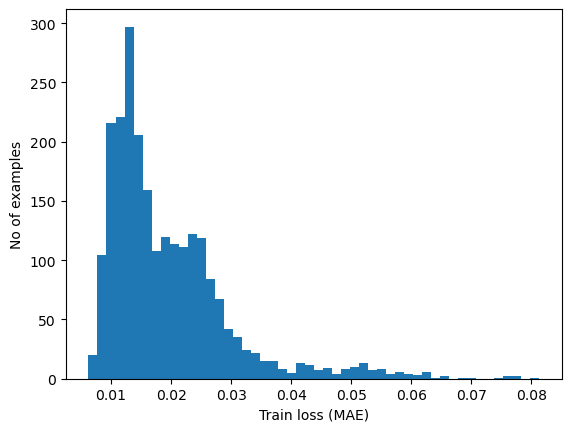

In [39]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss (MAE)")
plt.ylabel("No of examples")
plt.show()

We now calculate threshold. Let's take mean+1std.

<div>
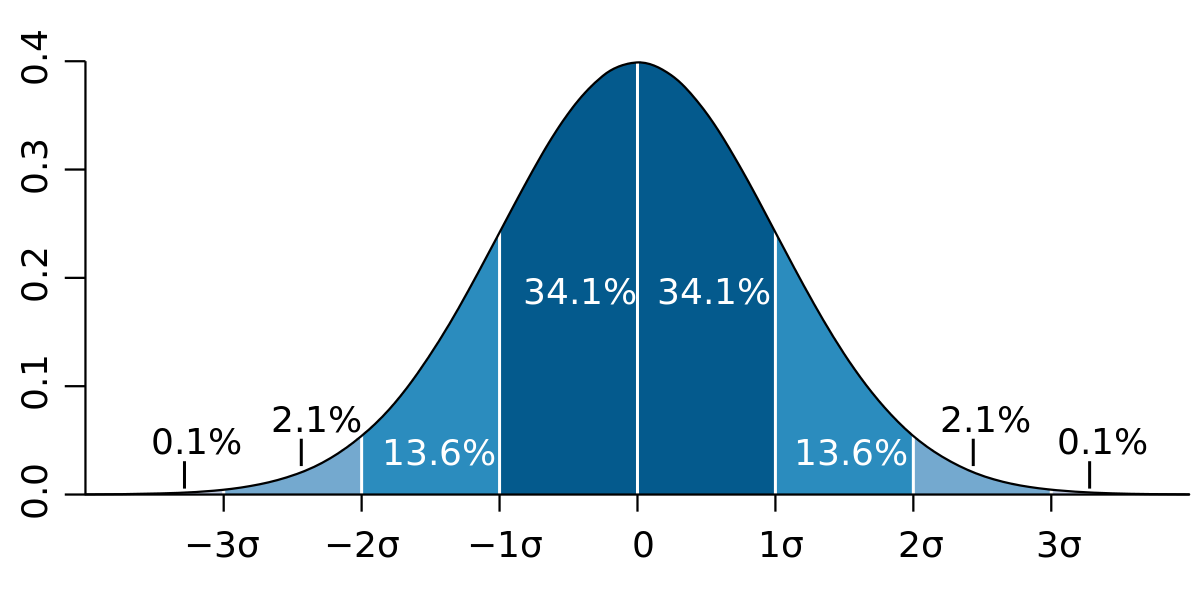
</div>

In [40]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.029958434


14/14 [==============================] - 0s 6ms/step


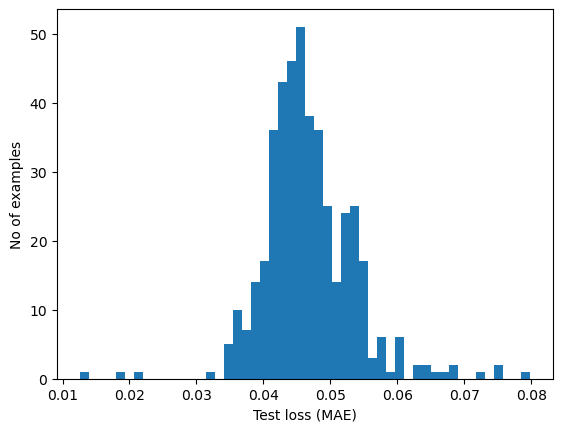

In [41]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss (MAE)")
plt.ylabel("No of examples")
plt.show()

In [42]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(sk.metrics.accuracy_score(labels, predictions)))
  print("Precision = {}".format(sk.metrics.precision_score(labels, predictions)))
  print("Recall = {}".format(sk.metrics.recall_score(labels, predictions)))

In [43]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.939
Precision = 0.994059405940594
Recall = 0.8964285714285715


#### Demo: Image segmentation

Now you're probably figured out that autoencoders work well for problems where the output is a processed version of the input. Therefore it works well for "image2image" or "audio2audio" problems. Think a few such examples for audio, image and language.

## Autoencoder inspired architectures

### U-Net

See: https://en.wikipedia.org/wiki/U-Net

<div>
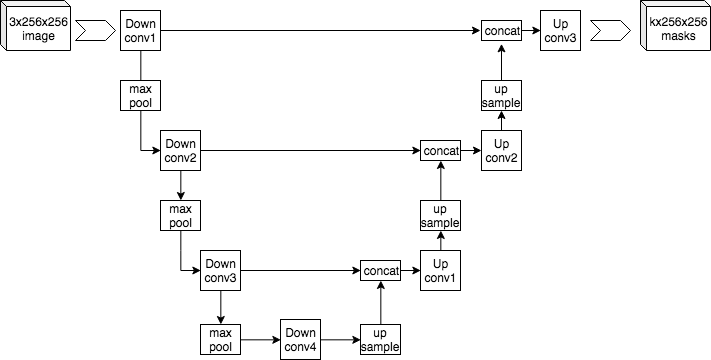
</div>

### Generative Adversarial Network (GAN)

StyleGAN: https://en.wikipedia.org/wiki/StyleGAN

Code: https://github.com/NVlabs/stylegan

### It's all about data - crazy ideas to collect data

Frozen people: https://mannequin-depth.github.io/

### DeepFakes

See: https://www.alanzucconi.com/2018/03/14/understanding-the-technology-behind-deepfakes/

Video: https://www.youtube.com/watch?v=OmB7fmi8JwY

Code: plenty

## References

TensorFlow Tutorials. URL: https://www.tensorflow.org/tutorials